# Text Data Analysis of YouTube


In [1]:
import pandas as pd #Datayı okumak, düzenlemek için.
import numpy as np #Data hakkında matematiksel işlemler yapmak için.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv(r"C:\Users\eylem\Desktop\YoutubeAnalysis\UScomments.csv",low_memory = False,on_bad_lines='skip')

In [3]:
# on_bad_lines='skip' ile okuma sırasında hatalı veri içeren satırları atladık, low_memory = False ile bellek optimizasyonlarını devre dışı bıraktık.

In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
comments.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [6]:
# False değerler null olmayan veriler anlamına geliyor.

In [7]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
# comment_text    26 boş değer olduğunu gördük.

In [9]:
 comments.dropna(inplace=True) #Boş değerleri siler. inplace=True ile mevcut veri çerevesini değiştirir. Yeni oluşturmaz.

In [10]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [11]:
# Şuanda hiç boş değerimiz yok.

  ## Sentiment Analysis (Duygu Analizi)

  ## Duygu özelliği çoğu zaman Polarity yani kutupluluk olarak adlandırılır. Bu kutuplar [-1,1] arasında olur. Bu genel bir ifadedir. Yeni özelliğimizin adı 'Polarity' olacak.

In [12]:
## TextBlob paketini yükleyelim.

In [13]:
!pip install textblob


In [14]:
from textblob import TextBlob 


In [15]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [16]:
comments.shape #Bu çok büyük bir veri

(691374, 4)

In [17]:
sample_df = comments[0:50]

In [18]:
sample_df.shape

(50, 4)

In [21]:
polarity = []
for comment in comments["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [22]:
comments['polarity'] = polarity

In [23]:
comments.head(15)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


# Wordcloud Analysis (Kelime Bulutu)

## Wordcloud analizi, metin verilerinin görselleştirilmesi için kullanılan etkili bir yöntemdir. Metinlerde en sık geçen kelimelerin görsel olarak temsil edilmesini sağlar. Bu analiz, bir metnin içeriğini hızlıca görsel olarak anlamak için kullanılır ve genellikle metin madenciliği ve duygu analizi gibi alanlarda yaygın olarak kullanılır.


In [ ]:
filter_positive = comments["polarity"]==1

In [ ]:
positive = comments[filter_positive]

In [ ]:
positive.head(5)

In [ ]:
filter_negative = comments["polarity"]==-1

In [ ]:
negative = comments[filter_negative]

In [ ]:
negative.head(5)

In [ ]:
from wordcloud import WordCloud, STOPWORDS #STOPWORDS burada is,the gibi anlamsız kelimelere karşılık geliyor. Bu kelimeler analizimize hiçbir anlam katmaz.

In [ ]:
comments['comment_text']

In [ ]:
type(comments['comment_text'])

In [ ]:
#Word cloud analiz için stringe çevirmeliyiz, Series data tipindeler.

In [ ]:
comments_string = positive['comment_text'].to_string(index=False)

In [ ]:
comments_string_neg = negative['comment_text'].to_string(index=False)

In [ ]:
print(comments_string[0:1000])

In [ ]:
set(STOPWORDS)

In [ ]:
font_path = r"C:\Users\eylem\AppData\Local\Microsoft\Windows\Fonts\KeeponTruckin.ttf" #fontu değiştirdik

In [ ]:
word_cloud = WordCloud(stopwords=set(STOPWORDS),font_path=font_path,colormap='summer').generate(comments_string)

In [ ]:
word_cloud_neg = WordCloud(stopwords=set(STOPWORDS),font_path=font_path,colormap='autumn').generate(comments_string_neg)

In [ ]:
plt.imshow(word_cloud)
plt.axis('off') # Eksenleri kapatır

In [ ]:
plt.imshow(word_cloud_neg)
plt.axis('off') # Eksenleri kapatır

# Perform Emoji's Analysis

##  Emoji analizi, metinlerde kullanılan emoji karakterlerinin anlamını ve duygusal içeriğini değerlendiren bir analiz türüdür. Metin madenciliği ve duygu analizi gibi alanlarda kullanılır. Emoji'ler genellikle duygusal ifadeleri ve mesajların tonunu iletmek için kullanılır ve metin analizinde önemli bir rol oynarlar.
## Bu kısımda emojilerin kaç defa geçtiğini analiz edip görselleştireceğiz.



In [27]:
import emoji

In [ ]:
emoji.__version__

In [24]:
comments["comment_text"].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [ ]:
#Emojiyi string ifadenin içinden çıkarmamız gerekir. Örneğin 4 indexli yorumumuzda deneyelim.

In [25]:
# comment = "trending 😉"

In [30]:
"""emojis_list = []
for char in comment:
    if char in emoji.EMOJI_DATA:
        emojis_list.append(char)"""
        

In [31]:
# print(emojis_list)

['😉']


In [34]:
emojis_list = []
for char in comments["comment_text"].dropna():
    if char in emoji.EMOJI_DATA:
        emojis_list.append(char)

In [37]:
emojis_list[0:10]

['👍', '❤️', '😂', '❤️', '💄', '🖤', '💕', '😒', '👎🏽', '🐘']

In [41]:
#Kaç defa geçtiğini görmek için daha verimli ve kullanımı kolay bir arayüz sunan collections modülünü kullanacağız.

In [42]:
from collections import Counter

In [43]:
Counter(emojis_list).most_common(10)

[('❤️', 164),
 ('❤', 148),
 ('👍', 120),
 ('😍', 120),
 ('😂', 90),
 ('♥', 43),
 ('💖', 38),
 ('💜', 28),
 ('🔥', 28),
 ('🐍', 23)]

In [44]:
#Şimdi bunları 2 listeye bölmem gerek.

In [45]:
Counter(emojis_list).most_common(10)[0]

('❤️', 164)

In [46]:
Counter(emojis_list).most_common(10)[0][0]

'❤️'

In [48]:
Counter(emojis_list).most_common(10)[1][0]

'❤'

In [49]:
Counter(emojis_list).most_common(10)[2][0]

'👍'

In [47]:
Counter(emojis_list).most_common(10)[0][1]

164

In [52]:
Counter(emojis_list).most_common(10)[1][1]

148

In [53]:
Counter(emojis_list).most_common(10)[2][1]

120

In [54]:
emojis = [Counter(emojis_list).most_common(10)[i][0] for i in range(10)]
freqs = [Counter(emojis_list).most_common(10)[i][1] for i in range(10)]
    

In [55]:
# Şimdi 2 ayrı listem var emojiler ve sıklıklar adında. Şimdi Bar Chart'ı kolayca oluşturabilirim.


In [61]:
import plotly.graph_objs as go

from plotly.offline import iplot

In [74]:
layout = go.Layout(
    title='Emoji Frequents',  # Grafik başlığı
    xaxis=dict(title='Emojiler'),  # X eksen başlığı
    yaxis=dict(title='Sıklıkları'),  # Y eksen başlığı
)

In [79]:
chart = go.Bar(x=emojis,y=freqs,marker=dict(color='rgb(255, 102, 102)',))

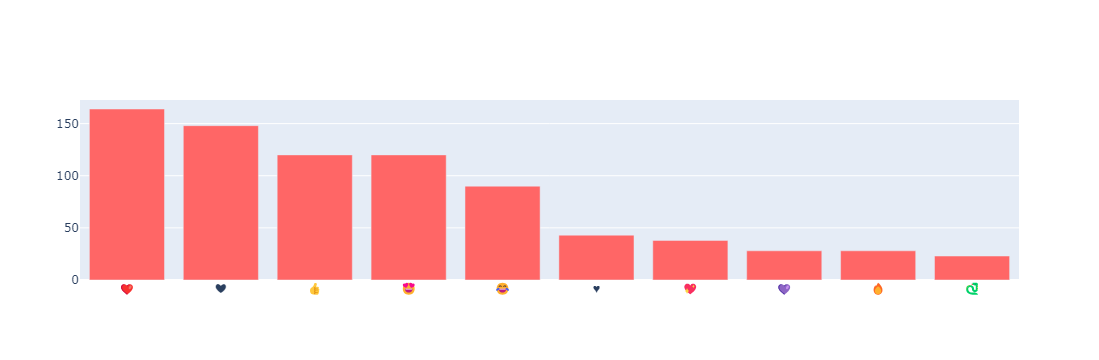

In [80]:
# Grafiği görüntüleme
iplot([chart])

# Collecting Entire Data of YouTube : Data Collection

 Python'da yerel bilgisayarımızdaki dosya sistemleriyle etkileşim kurmak için os modülünü kullanabiliriz.

In [82]:
import os

 Mevcut çalışma dizininde bulunan tüm dosya ve klasörlerin bir listesini döndüren listdir() fonksiyonuna bakalım.

In [87]:
files = os.listdir(r"C:\Users\eylem\Desktop\YoutubeAnalysis\additional_data")

In [88]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

2 çeşit dosyamız var
1)JSON --> key:value ile ayrılmış datalar
2)CSV --> virgüller ile ayrılmış datalar
2 dosya da aynı içeriğe sahiptir.

In [90]:
files_csv = [file for file in files if '.csv' in file]

[yeni_öğe for öğe in liste if koşul]Bu yapı, bir listedeki dosya isimlerini filtrelemek için kullanılan bir Python listesi üreteci (list comprehension) yapısıdır. List comprehension, bir listeden yeni bir liste oluşturmak için kullanılan kısa ve okunaklı bir Python özelliğidir. Yani burada, csv formatlı dosyalarımızdan yeni bir liste oluşturduk.


In [99]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [100]:
full_df = pd.DataFrame() # içi boş df
path = r"C:\Users\eylem\Desktop\YoutubeAnalysis\additional_data"
for file in files_csv:
    current_df = pd.read_csv(path+"/"+file,encoding="iso-8859-1",on_bad_lines='skip')
    
    full_df = pd.concat([full_df,current_df],ignore_index = True)

Bu veri seti, çeşitli ülkelerden gelen metin içeriğini içermektedir. Örneğin; Türkçe metinlerde sıkça kullanılan İ, Ş, Ğ, Ç, Ü, Ö gibi Türk alfabesine özgü harfler, Latin alfabesinde doğrudan bulunmaz. Bu harfler, Türkçe metinlerin kodlanması için genellikle iso-8859-9 kodlaması kullanılır. İlgili dillerin metinlerinin doğru şekilde kodlanması için özel karakter kodlamaları gerektirebilir.

pd.concat() fonksiyonu, Pandas kütüphanesinde kullanılan ve veri birleştirme işlemlerini gerçekleştirmek için kullanılan bir fonksiyondur. ignore_index=True olarak ayarlandığında, birleştirilen verilerin dizin etiketleri yok sayılır ve yeni bir dizi etiketi oluşturulur.

In [101]:
full_df.duplicated() 

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [102]:
full_df = full_df.drop_duplicates()

In [103]:
full_df.shape

(339525, 16)

In [104]:
full_df[0:1000].to_csv(r"C:\Users\eylem\Desktop\YoutubeAnalysis\export_data/youtube_sample.csv",index=False)

index=False yazdık çünkü DataFrame'deki satır indekslerinin CSV dosyasına yazılmasını istemiyoruz

In [105]:
full_df[0:1000].to_json(r"C:\Users\eylem\Desktop\YoutubeAnalysis\export_data/youtube_sample.json")

In [107]:
from  sqlalchemy import create_engine 

SQL veritabanı için bir bağlantı oluşturmak için "create engine" ifadesi genellikle  SQLAlchemy kütüphanesi kullanılarak kullanılır.

In [112]:
engine = create_engine(r"sqlite:///C:\Users\eylem\Desktop\YoutubeAnalysis\export_data/youtube_sample.sqlite")

create_engine() fonksiyonu ile bir SQLite veritabanı motoru oluşturuyoruz. 

In [114]:
full_df[0:1000].to_sql(name="Users",con=engine,if_exists = 'replace')

1000

full_df DataFrame'inin ilk 1000 satırını "Users" adlı bir tabloya aktarıyoruz. Varolan bir tablo ile aynı isimde bir tablo bulunduğunda, if_exists='replace' parametresi sayesinde bu tabloyu değiştiriyoruz.

# Analysing The Most Liked Category


In [131]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


En çok beğenilen kategoriyi analiz etmek için, kategori ismi adında bir sütuna sahip olmadığımızı görüyoruz. category_id adlı sütunumuz bize yol gösterecek.

In [118]:
full_df["category_id"].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [120]:
json_df = pd.read_json(r"C:\Users\eylem\Desktop\YoutubeAnalysis\additional_data/US_category_id.json")

In [121]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [123]:
json_df["items"]

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [124]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [125]:
json_df["items"][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [126]:
blank_dict = {}

In [136]:
for item in json_df["items"].values:
    blank_dict[int(item["id"])] = item["snippet"]["title"]

In [137]:
blank_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers',
 1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28

In [140]:
full_df["category_name"] = full_df["category_id"].map(blank_dict)

In [141]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


Şimdi bar grafiği ile en çok beğenilen kategoriyi bulalım.

In [145]:
total_likes_by_category = full_df.groupby('category_name')["likes"].sum()

([], [])

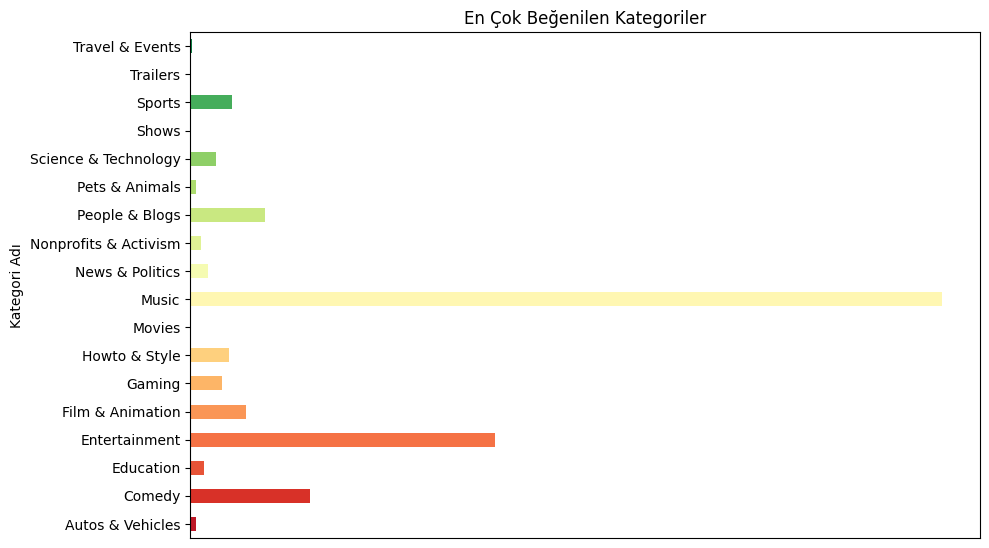

In [165]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("RdYlGn", len(total_likes_by_category))
total_likes_by_category.plot(kind='barh', color=palette)
plt.title('En Çok Beğenilen Kategoriler')
plt.ylabel('Kategori Adı')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
# x eksenindeki etiketleri devre dışı bırak
plt.xticks([])